* Data Exploration and Preprocessing:
* Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
* Handle missing values as per the best practices (imputation, removal, etc.).
* Apply scaling techniques to numerical features:
* Standard Scaling
* Min-Max Scaling
* Discuss the scenarios where each scaling technique is preferred and why.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [3]:
#Reading the data file
df=pd.read_csv("adult_with_headers.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Checking missing Values
df.isnull().sum()
#There is no missing values

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
#Checking if there are any special characters including null values
import re
meaningless_pattern = re.compile(r'^[^A-Za-z0-9]+$')
mask = df.applymap(lambda x: bool(meaningless_pattern.match(str(x))) if pd.notnull(x) else True)
# mask stores another data frame like df where special characters as true and meaningful cells as false
count = mask.sum()
#Only True values are counted
print(count[count>0])

C:\Users\joghi\AppData\Local\Temp\ipykernel_11372\3771435824.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: bool(meaningless_pattern.match(str(x))) if pd.notnull(x) else True)


workclass         1836
occupation        1843
native_country     583
dtype: int64


In [6]:
#Performing imputation

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        fill_value = df.loc[~mask[col],col].median()
        #~mask[col]: This flips the True and False values using bitwise NOT (~),
        #From column col, it gives only the rows where mask[col] is False (i.e., the meaningful entries) and compute its median.
    else:
        fill_value = df.loc[~mask[col],col].mode()[0]
    df.loc[mask[col],col] = fill_value

In [7]:
# Checking again if all the special characters are replaced.
meaningless_pattern = re.compile(r'^[^A-Za-z0-9]+$')
mask = df.applymap(lambda x: bool(meaningless_pattern.match(str(x))) if pd.notnull(x) else True)
count = mask.sum()
print(count[count>0])

C:\Users\joghi\AppData\Local\Temp\ipykernel_11372\2803571921.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: bool(meaningless_pattern.match(str(x))) if pd.notnull(x) else True)


Series([], dtype: int64)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.duplicated().any()

True

In [10]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [11]:
df.duplicated().sum()
#There are 24 duplicate values and those can be dropped off

24

In [12]:
#Dropping the duplicate values
df.drop_duplicates(inplace=True,ignore_index=True)

In [13]:
#Checking if any duplicates is still present
df.duplicated().any()
#There is no duplicates

False

In [14]:
num_col = [i for i in df.columns if df[i].dtype !='O']
cat_col = [i for i in df.columns if df[i].dtype =='O']
print(num_col)
print(cat_col)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [15]:
#Statistics Summary
columns = ["Mean","Median","Mode","SD","CV","IQR","Expected SD assuming Normal Distribution"]

#Creating Empty DataFrame
df1 = pd.DataFrame(columns=columns, index=num_col)
df1

,Mean,Median,Mode,SD,CV,IQR,Expected SD assuming Normal Distribution
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital_gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital_loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hours_per_week,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Computing and inserting the values
for i in num_col:
    for j in columns:
        match j:
            case "Mean":
                df1.loc[i,j] = df[i].mean()
            case "Median":
                df1.loc[i,j] = df[i].median()
            case "Mode":
                df1.loc[i,j] = df[i].mode()[0]
            case "SD":
                df1.loc[i,j] = df[i].std()
            case "CV":
                df1.loc[i,j] = (df[i].std()/df[i].mean())*100
            case "IQR":
                Q1=df[i].quantile(0.25)
                Q3= df[i].quantile(0.75)
                IQR = Q3-Q1
                df1.loc[i,j] = IQR
            case "Expected SD assuming Normal Distribution":
                df1.loc[i,j] = IQR/1.35


In [17]:
df1

,Mean,Median,Mode,SD,CV,IQR,Expected SD assuming Normal Distribution
age,38.585549,37.0,36,13.637984,35.344796,20.0,14.814815
fnlwgt,189780.848511,178356.0,123011,105556.471009,55.620191,119166.0,88271.111111
education_num,10.081815,10.0,9,2.571633,25.50764,3.0,2.222222
capital_gain,1078.443741,0.0,0,7387.957424,685.057286,0.0,0.0
capital_loss,87.368227,0.0,0,403.101833,461.382641,0.0,0.0
hours_per_week,40.440329,40.0,40,12.346889,30.531129,5.0,3.703704


* Mean ≈ Median ≈ Mode	Symmetric (bell-shaped)
* Mean > Median > Mode	Right-skewed (positive skew)
* Mean < Median < Mode	Left-skewed (negative skew)
* IQR/1.35 is the expected SD when the data is normally distributed
* If SD ≈ IQR / 1.35 → the distribution might be close to normal (since for normal distributions, IQR ≈ 1.35 × SD).
* If SD >> IQR / 1.35 → potential outliers or heavy tails.
* If SD << IQR / 1.35 → very tightly clustered tails.
* Low CV (< 20%)	Low variability; data points cluster near mean
* Moderate CV (20–30%)	Moderate variability
* High CV (> 30%)	High variability; data is more spread out

####### STATISTICAL SUMMARY ############

* age --> Since Mean is greater than Median, the data is slightly right skewed.
       # Since CV is greater than 35%, data is more spread out
       # Since SD is lesser than expected SD, it has tightly clustered tails
* fnlwgt --> Slightly positively skewed
          # Has high variability
          # It has potential outliers and heavy tails
* education_num --> Mean and Median are almost same. Hence, seems to be normally distributed.
                 # It has Moderate variability
                 # SD and expected SD are almost same. Hence, distribution might be close to normal.
* capital_gain --> Mean is extremely larger than the median which means the data are heavily right skewed
                # Data have high variability
                # SD >> Expected_SD which means there are outliers and heavy tails
* capital_loss --> Mean is extremely larger than the median which means the data are heavily right skewed
                # Data have high variability
                # SD >> Expected_SD which means there are outliers and heavy tails
* hours_per_week -->  Mean and Median are almost same. Hence, seems to be normally distributed.
                #    Has moderate variability and potential outliers

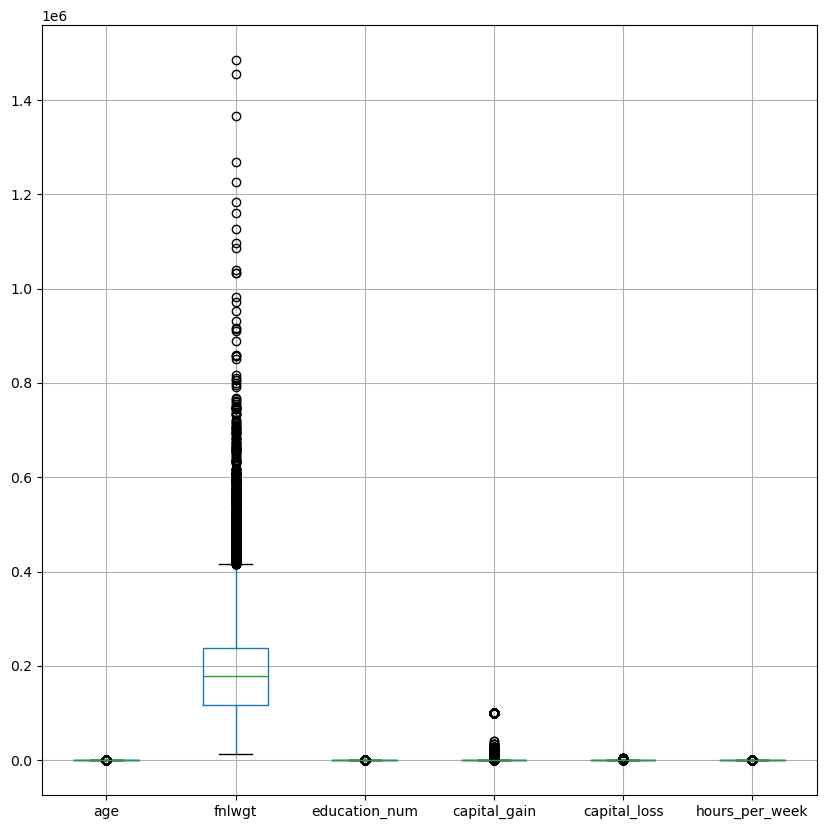

In [20]:
df[num_col].boxplot(figsize=(10,10))
plt.show()


In [21]:
###Outliers_Capping#######

def outliers_capping(num_df,column):
 if column not in ["capital_gain","capital_loss"]:
    Q1=num_df[column].quantile(0.25)
    Q3=num_df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    df[column] = df[column].apply(lambda x:lower_bound if x <lower_bound else upper_bound if x>upper_bound else x)

for col in df[num_col].select_dtypes(['int','float']).columns:
    outliers_capping(df[num_col],col)


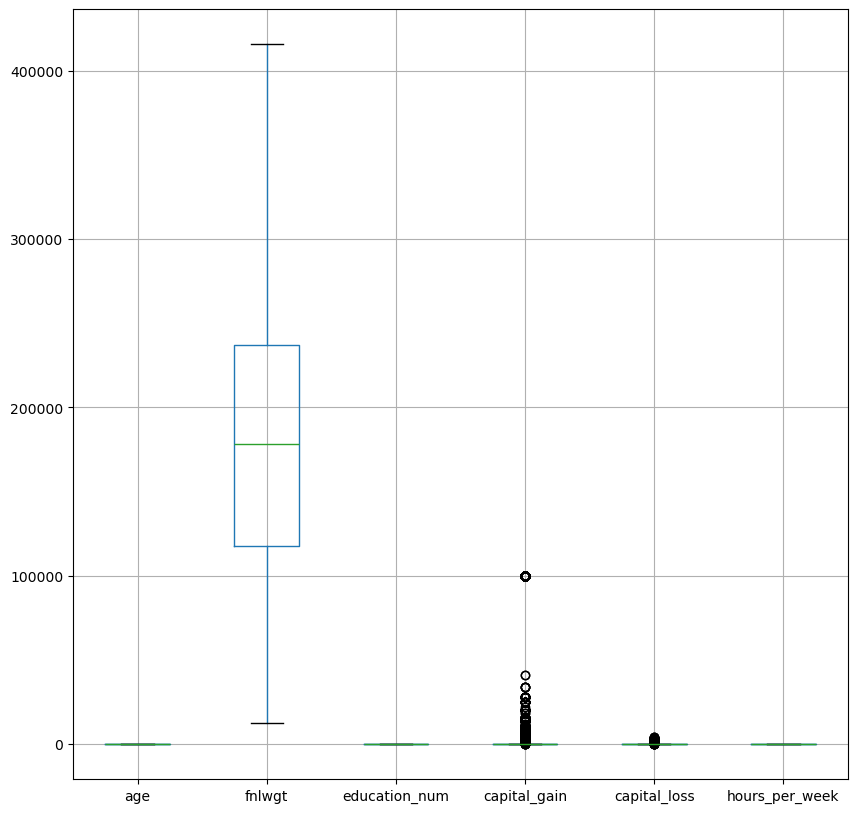

In [22]:
df[num_col].boxplot(figsize=(10,10))
plt.show()

############# SCALING #########
* Standard Scaler
  * To be used when data is approximately normally distributed because it keeps the curve centered and interpretable.
  * 𝑧 =(𝑥−𝜇)/𝜎
  * Where:𝑥 is an individual data point
         #𝜇 is the mean of the feature
         #𝜎 is the standard deviation of the feature
         #𝑧 is the resulting standardized value (also called the z-score)

  * This transformation shifts the distribution to have: Mean = 0 Standard deviation = 1

* MinMax Scalar
  * To be used when data doesn’t follow a Gaussian distribution
  * It scales features to a fixed range—default is [0, 1]—which is useful when distribution shape doesn’t matter.
  * Unlike StandardScaler (which centers and reshapes data assuming some symmetry), MinMaxScaler doesn’t distort skewness—it just compresses values proportionally.
  * 𝑥′=(𝑥−𝑥min)/(𝑥max−𝑥min)
  * Where:𝑥is the original value
        * 𝑥min is the minimum value of the feature
        * 𝑥max is the maximum value of the feature
        * 𝑥′ is the scaled value in the range [0,1]

In [24]:
#Visualizing the distribution of the data
import seaborn as sns


0 age
1 fnlwgt
2 education_num
3 capital_gain
4 capital_loss
5 hours_per_week


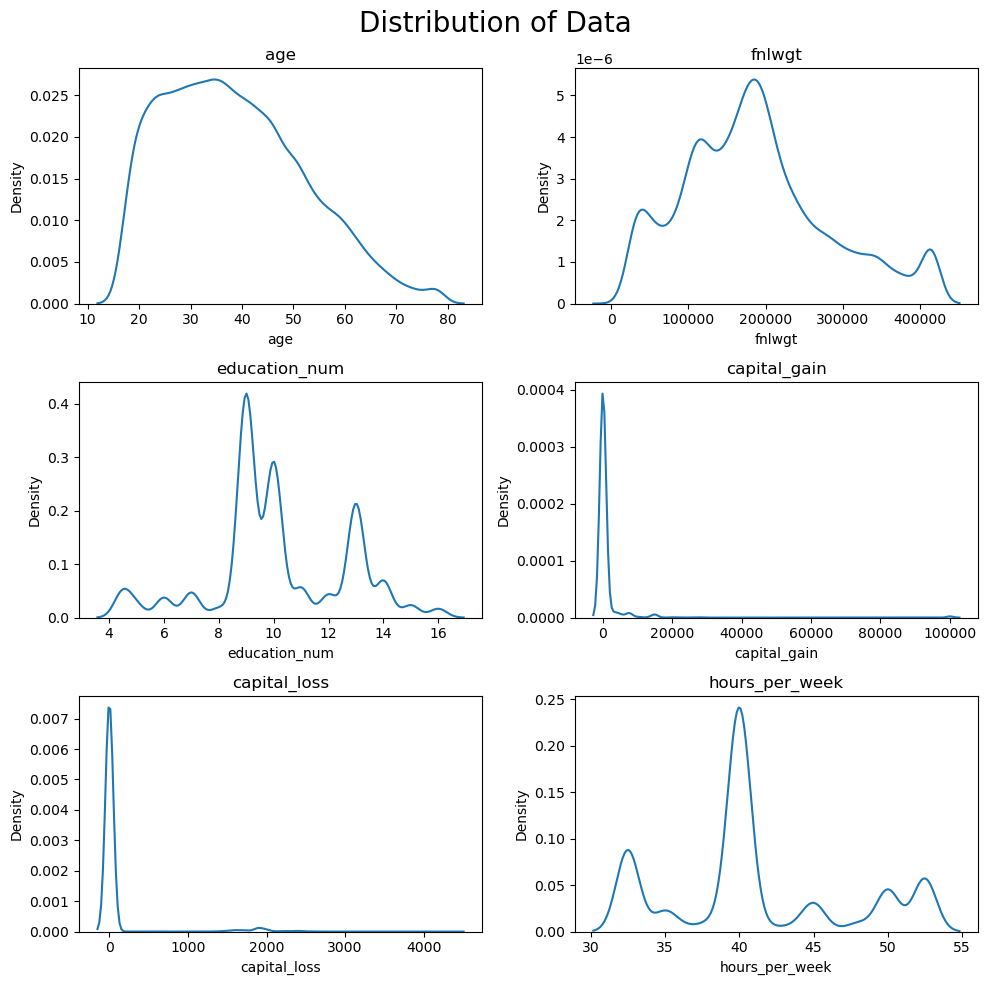

In [25]:
fig,axs = plt.subplots(3,2,figsize =(10,10))
plt.suptitle("Distribution of Data",fontsize=20)

for i,col in enumerate(df[num_col]):
    print(i,col)
    row_idx = i//2
    col_idx = i%2
    sns.kdeplot(df[col],ax=axs[row_idx,col_idx])
    axs[row_idx,col_idx].set_title(col)
plt.tight_layout()
plt.show()

In [26]:
#On comparing the Statistics summary and the kdeplots, we can conclude that though mean and median are almost same for some of the features, it alone
#cannot determine the distribution of data. The shape of the data is also important. From the visualization, we could see that none of the features is
#normally distributed. Datas have skewness, irregular peaks
#Hence MinMax scaling would suit the data since it doesn’t distort skewness and it just compresses values proportionally

In [27]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()

In [28]:
df[num_col] = MMS.fit_transform(df[num_col])

In [29]:
df[num_col]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.360656,0.161680,0.739130,0.021740,0.0,0.375
1,0.540984,0.176044,0.739130,0.000000,0.0,0.000
2,0.344262,0.504046,0.391304,0.000000,0.0,0.375
3,0.590164,0.551325,0.217391,0.000000,0.0,0.375
4,0.180328,0.808324,0.739130,0.000000,0.0,0.375
...,...,...,...,...,...,...
32532,0.163934,0.607294,0.652174,0.000000,0.0,0.275
32533,0.377049,0.352179,0.391304,0.000000,0.0,0.375
32534,0.672131,0.346072,0.391304,0.000000,0.0,0.375
32535,0.081967,0.468960,0.391304,0.000000,0.0,0.000


0 age
1 fnlwgt
2 education_num
3 capital_gain
4 capital_loss
5 hours_per_week


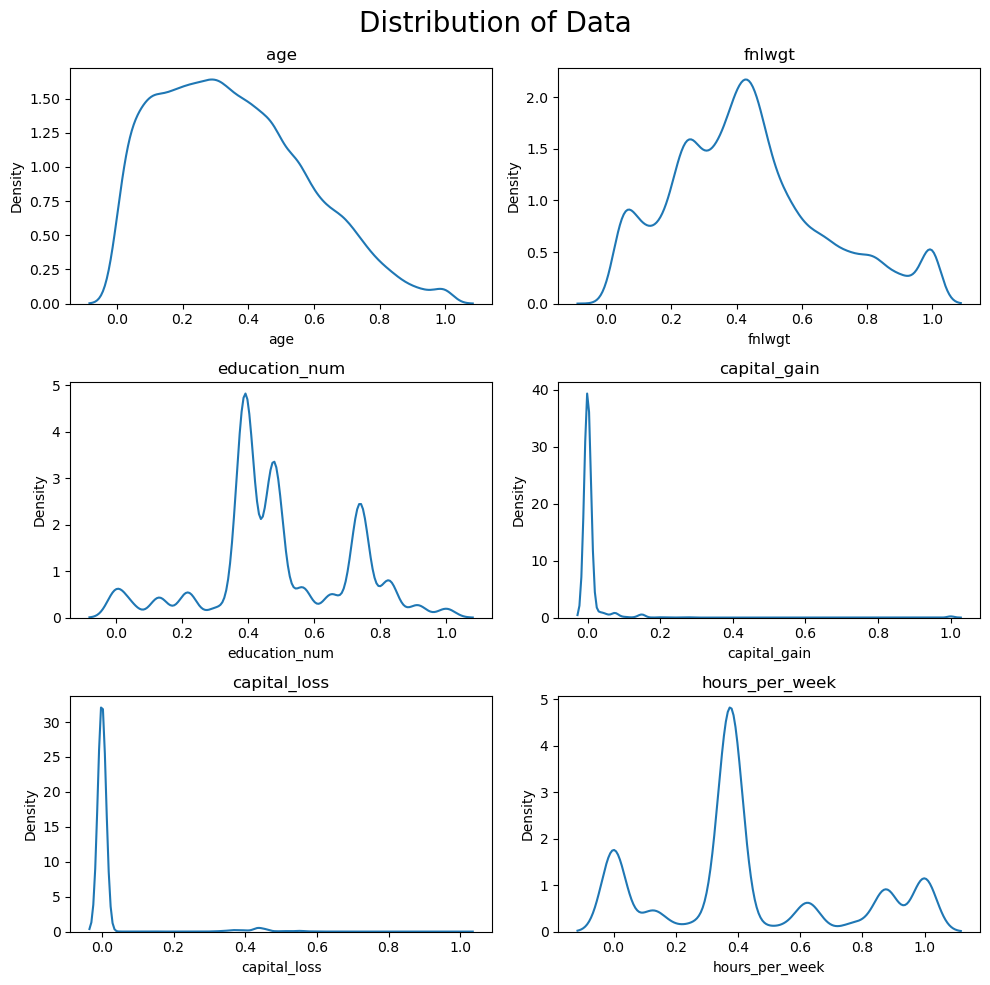

In [30]:
fig,axs = plt.subplots(3,2,figsize =(10,10))
plt.suptitle("Distribution of Data",fontsize=20)

for i,col in enumerate(df[num_col]):
    print(i,col)
    row_idx = i//2
    col_idx = i%2
    sns.kdeplot(df[col],ax=axs[row_idx,col_idx])
    axs[row_idx,col_idx].set_title(col)
plt.tight_layout()
plt.show()

#We don't have any disturbance in the shape of the distribution but the Scale is reduced each feature falls under 0 to 1

In [31]:
#2. Encoding Techniques:
#•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
#•	Use Label Encoding for categorical variables with more than 5 categories.
#•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.



In [32]:
df[cat_col]

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32532,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32533,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32534,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32535,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [33]:
df[cat_col].nunique()

workclass          8
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
native_country    41
income             2
dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False)

In [35]:
for col in df[cat_col]:
    print (col,df[col].nunique())
    if df[col].nunique() < 5:
        encoded = ohe.fit_transform(df[[col]])
        #It contains only the binary 0/1 values but no column names yet.
        encoded_df = pd.DataFrame(encoded, columns = [f"{col}_{cat}" for cat in ohe.categories_[0]] ,index=df.index)
        #col is the name of the original column (e.g. "sex").
        # ohe.categories_[0] is a list of all unique categories found in that column (e.g. ['Male', 'Female']).
        # The list comprehension formats each into col_category style.(sex_Male,sex_Female)
        df=df.drop(columns=[col]).join(encoded_df)
    else:
        df[col] = le.fit_transform(df[col])


workclass 8
education 16
marital_status 7
occupation 14
relationship 6
race 5
sex 2
native_country 41
income 2


In [36]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'sex_ Female',
       'sex_ Male', 'income_ <=50K', 'income_ >50K'],
      dtype='object')

In [37]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.360656,6,0.161680,9,0.739130,4,0,1,4,0.021740,0.0,0.375,38,0.0,1.0,1.0,0.0
1,0.540984,5,0.176044,9,0.739130,2,3,0,4,0.000000,0.0,0.000,38,0.0,1.0,1.0,0.0
2,0.344262,3,0.504046,11,0.391304,0,5,1,4,0.000000,0.0,0.375,38,0.0,1.0,1.0,0.0
3,0.590164,3,0.551325,1,0.217391,2,5,0,2,0.000000,0.0,0.375,38,0.0,1.0,1.0,0.0
4,0.180328,3,0.808324,9,0.739130,2,9,5,2,0.000000,0.0,0.375,4,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.163934,3,0.607294,7,0.652174,2,12,5,4,0.000000,0.0,0.275,38,1.0,0.0,1.0,0.0
32533,0.377049,3,0.352179,11,0.391304,2,6,0,4,0.000000,0.0,0.375,38,0.0,1.0,0.0,1.0
32534,0.672131,3,0.346072,11,0.391304,6,0,4,4,0.000000,0.0,0.375,38,1.0,0.0,1.0,0.0
32535,0.081967,3,0.468960,11,0.391304,4,0,3,4,0.000000,0.0,0.000,38,0.0,1.0,1.0,0.0


* Label Encoding
* Assigns each unique category a numeric label.
* Example: {'Red': 0, 'Green': 1, 'Blue': 2}
* Pros: Simple, memory efficient.
* Cons: Implies an ordinal relationship (i.e. Red < Green < Blue), which might mislead models like linear regression or k-NN if the categories are nominal.

* One Hot Encoding
* Creates a new binary column for each category.
* Example:
* Red   →  [1, 0, 0]
* Green →  [0, 1, 0]
* Blue  →  [0, 0, 1]
* Pros: No ordinal assumption; better for most algorithms that treat inputs independently.
* Cons: Increases dimensionality, especially if the column has many unique categories (i.e. high cardinality).

* Encoder     	Output Type	     Preserves Order?	Suitable For
* LabelEncoder	Single column	 ❌ No	            Trees,internal pipelines
* OrdinalEncoder	Single column	 ✅ Yes	            Ordered categories
* OneHotEncoder	Multiple columns ❌ No	            Nominal features, linear models

In [39]:
#3. Feature Engineering:
#•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
#•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [40]:
ori_df= pd.read_csv("adult_with_headers.csv")

In [41]:
ori_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [42]:
#FEATURE 1

df["Extended_Work"] = (ori_df["hours_per_week"]>40).astype(int)
df

#This feature can be used to understand if working extra hours would result in higher pay or not

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,Extended_Work
0,0.360656,6,0.161680,9,0.739130,4,0,1,4,0.021740,0.0,0.375,38,0.0,1.0,1.0,0.0,0
1,0.540984,5,0.176044,9,0.739130,2,3,0,4,0.000000,0.0,0.000,38,0.0,1.0,1.0,0.0,0
2,0.344262,3,0.504046,11,0.391304,0,5,1,4,0.000000,0.0,0.375,38,0.0,1.0,1.0,0.0,0
3,0.590164,3,0.551325,1,0.217391,2,5,0,2,0.000000,0.0,0.375,38,0.0,1.0,1.0,0.0,0
4,0.180328,3,0.808324,9,0.739130,2,9,5,2,0.000000,0.0,0.375,4,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,0.163934,3,0.607294,7,0.652174,2,12,5,4,0.000000,0.0,0.275,38,1.0,0.0,1.0,0.0,1
32533,0.377049,3,0.352179,11,0.391304,2,6,0,4,0.000000,0.0,0.375,38,0.0,1.0,0.0,1.0,1
32534,0.672131,3,0.346072,11,0.391304,6,0,4,4,0.000000,0.0,0.375,38,1.0,0.0,1.0,0.0,0
32535,0.081967,3,0.468960,11,0.391304,4,0,3,4,0.000000,0.0,0.000,38,0.0,1.0,1.0,0.0,0


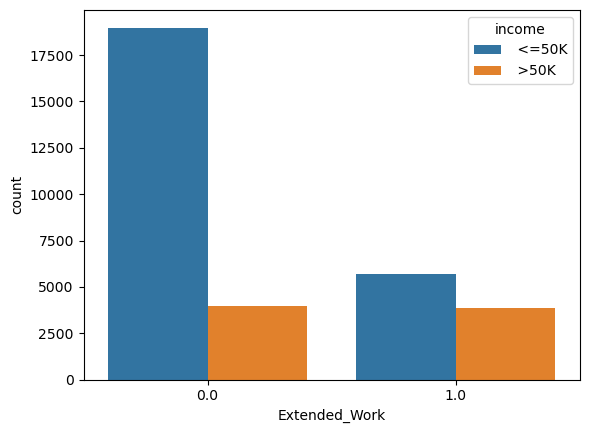

In [43]:
sns.countplot(x=df['Extended_Work'], hue=ori_df['income'])
plt.show()

In [44]:
#From this graph, we could understand most of the people whose working hours is less than or equal to 40, tend to earn lesser while few of them though they
#work less, income is more

In [45]:
#Feature 2
import numpy as np
Conditions = [ori_df["age"] <30,
              (ori_df["age"] >=30) & (ori_df["age"] <=50),
              ori_df["age"]>50]
Labels = [1,2,3]

ori_df["age_cat"] = np.select(Conditions,Labels)
ori_df

#This can be used to check if the age category is impacting the income


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,2
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,3
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,2
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,3
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,1


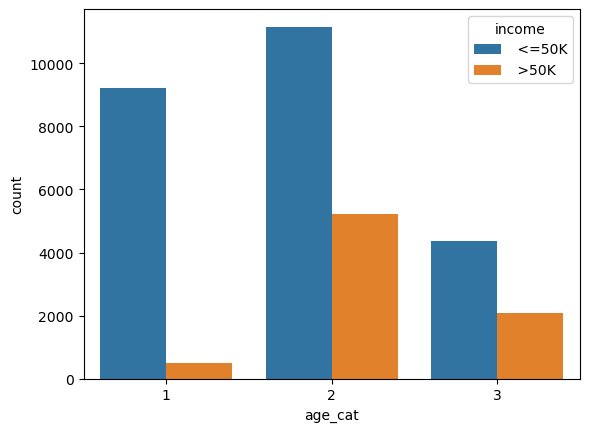

In [46]:
sns.countplot(x=ori_df["age_cat"], hue=ori_df["income"])
plt.show()

In [47]:
#From this graph, we could conclude most of the young people are earning less than 50k while very few are earning above 50k
#From the overall comparison, many middle aged people are more than 50k.

In [48]:
#Log transformation is meant for continuous numerical features, especially those that are right-skewed
#Log transformation is a powerful technique used in data preprocessing to make skewed data more normal-like,
  #which can improve the performance of many statistical models and visualizations.

In [49]:
df["age"] = np.log1p(df["age"])

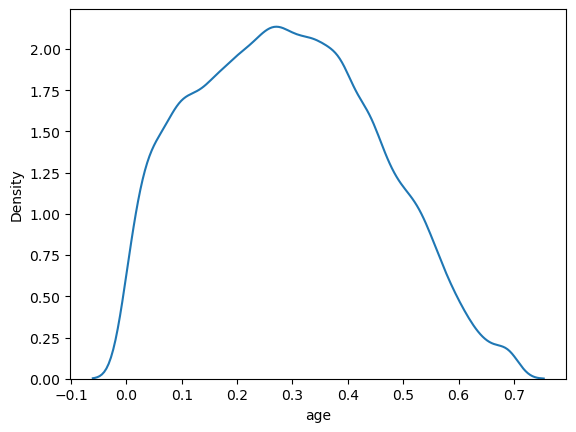

In [50]:
sns.kdeplot(df["age"])
plt.show()

#Now the skewness is reduced and looks like a bell shaped curve

In [51]:
from sklearn.ensemble import IsolationForest

In [52]:
#4. Feature Selection:
#•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
#•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [53]:
iso = IsolationForest(n_estimators=100,contamination=0.1)

In [54]:
iso1=iso.fit(df)

In [55]:
iso2=iso.predict(df)

In [56]:
iso2

array([ 1,  1,  1, ...,  1,  1, -1])

In [57]:
#Getting the index values of the outliers
print(np.where(iso2<0))

(array([    4,     6,     8, ..., 32519, 32521, 32536], dtype=int64),)


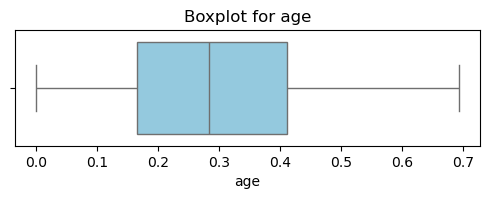

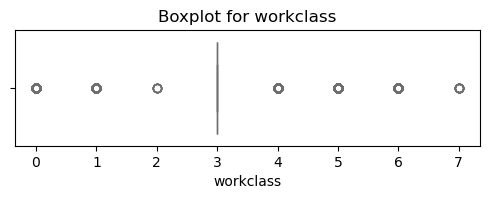

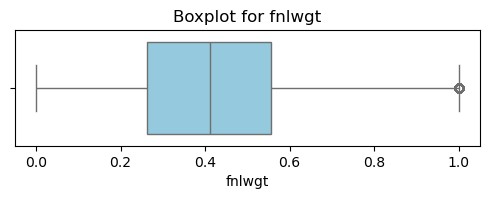

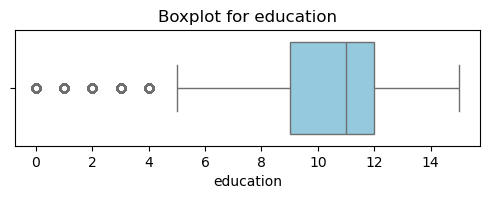

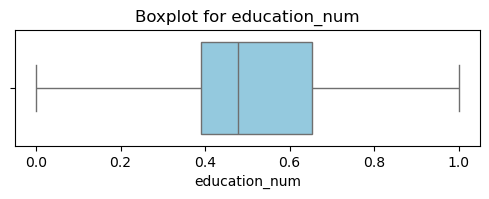

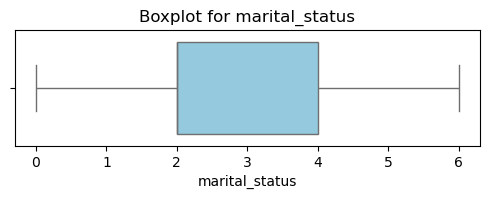

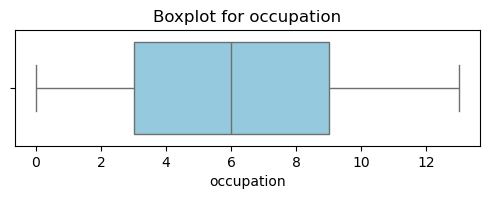

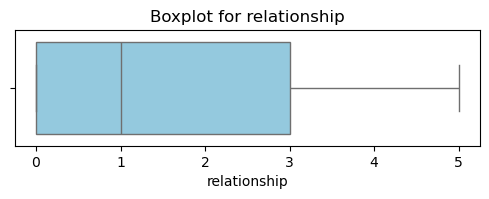

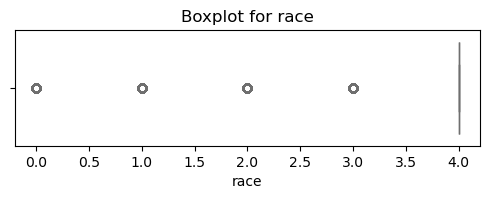

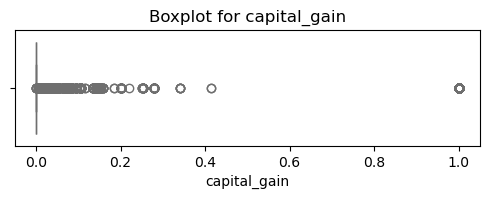

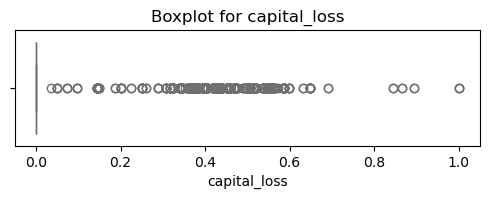

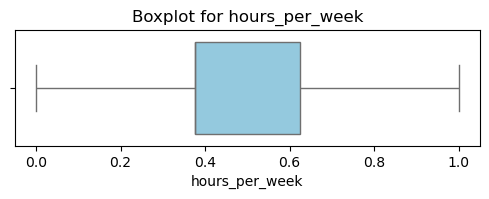

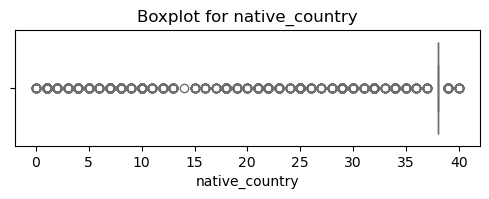

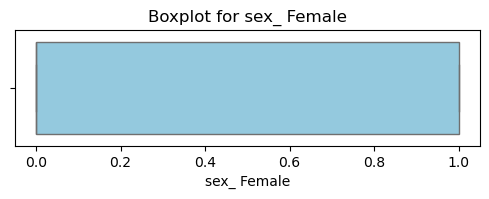

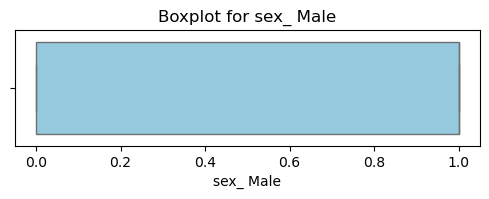

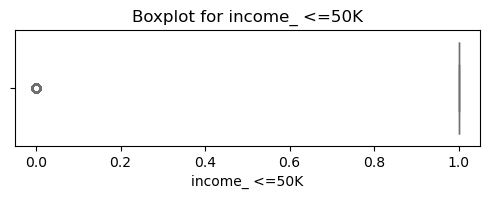

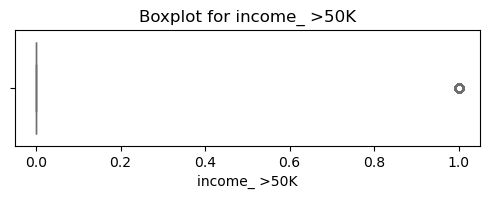

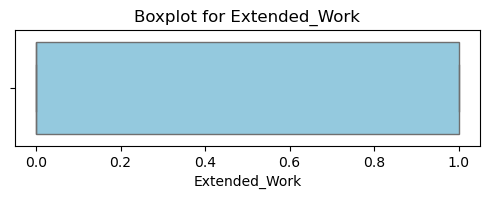

In [58]:
for col in df.columns:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.show()

In [59]:
#Removing the outliers
df["anomaly"] = iso2
df_clean = df[df["anomaly"]==1].drop("anomaly",axis=1)
df_clean

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,Extended_Work
0,0.307967,6,0.161680,9,0.739130,4,0,1,4,0.02174,0.0,0.375,38,0.0,1.0,1.0,0.0,0
1,0.432421,5,0.176044,9,0.739130,2,3,0,4,0.00000,0.0,0.000,38,0.0,1.0,1.0,0.0,0
2,0.295845,3,0.504046,11,0.391304,0,5,1,4,0.00000,0.0,0.375,38,0.0,1.0,1.0,0.0,0
3,0.463837,3,0.551325,1,0.217391,2,5,0,2,0.00000,0.0,0.375,38,0.0,1.0,1.0,0.0,0
5,0.283575,3,0.674910,12,0.826087,2,3,5,4,0.00000,0.0,0.375,38,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,0.078781,3,0.738287,15,0.478261,4,10,1,4,0.00000,0.0,0.375,38,0.0,1.0,1.0,0.0,1
32532,0.151806,3,0.607294,7,0.652174,2,12,5,4,0.00000,0.0,0.275,38,1.0,0.0,1.0,0.0,1
32533,0.319943,3,0.352179,11,0.391304,2,6,0,4,0.00000,0.0,0.375,38,0.0,1.0,0.0,1.0,1
32534,0.514099,3,0.346072,11,0.391304,6,0,4,4,0.00000,0.0,0.375,38,1.0,0.0,1.0,0.0,0


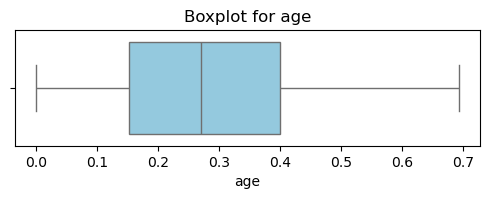

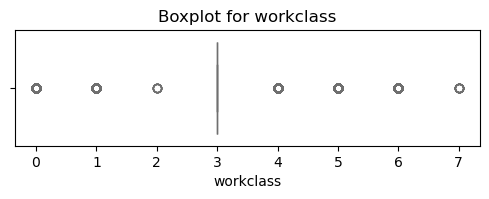

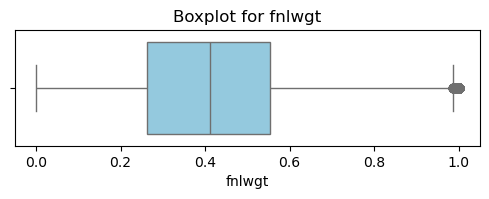

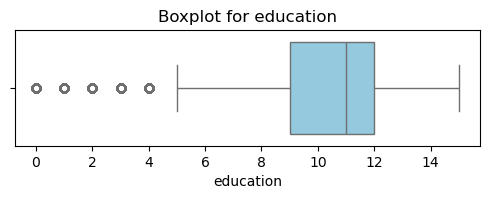

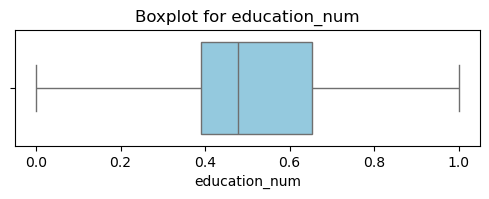

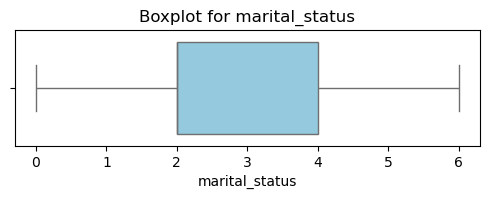

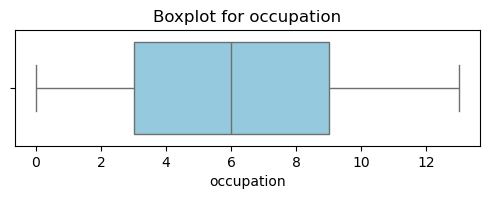

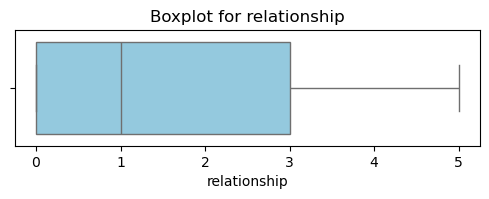

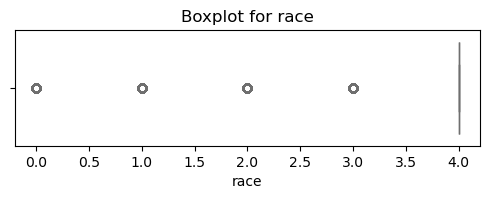

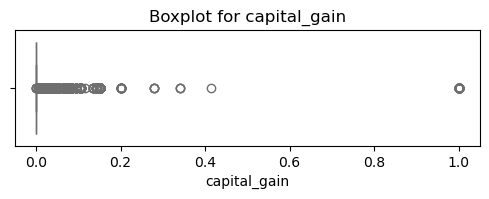

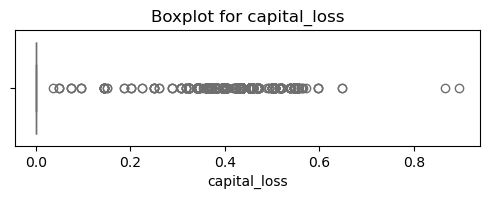

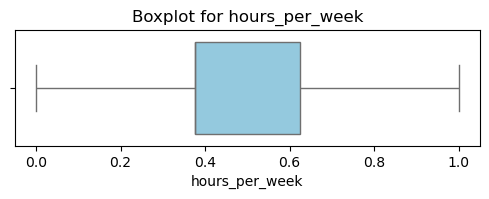

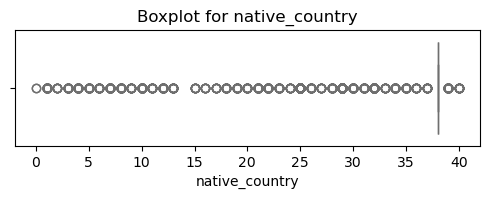

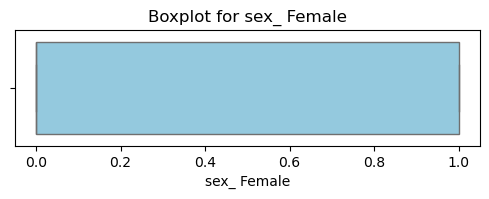

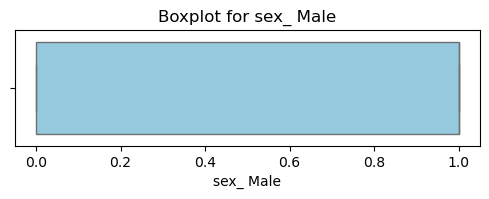

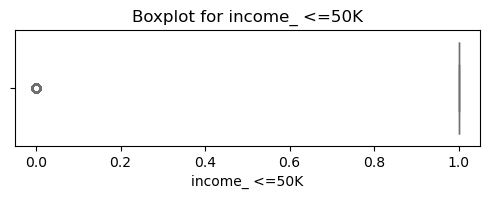

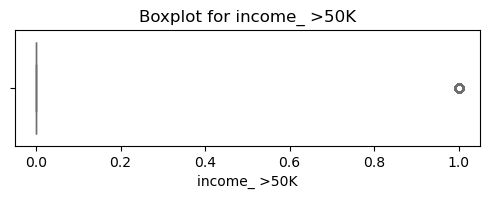

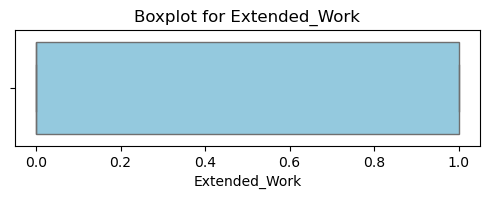

In [60]:
for col in df_clean.columns:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df_clean[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.show()

In [ ]:
!pip install ppscore

In [ ]:
!pip install --upgrade --force-reinstall numpy pandas

In [ ]:
import ppscore as pps



In [88]:
ori_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'age_cat'],
      dtype='object')

In [ ]:
for col in ori_df.columns:
  if col !='income':
     score=pps.score(ori_df,x=col,y='income')
     print(col,"--",score["ppscore"])

#PPS ranges from 0 (no predictive power) to 1 (perfect predictor) and can be applied on categorical data as well.
#Here Education_num and capital_gain has the highest predictive score comparitively for the target while columns like marital_status, relationship doesn't contribute to predicting the target.
#These can be avoided

In [ ]:
corr= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")


#Feature	                  Correlation Heatmap	         PPS Matrix
#Captures	                Linear association	         Predictive power (non-linear too)
#Value Range	              -1 to +1	                   0 to 1
#Symmetric?	              Yes	                         No
#Supports categoricals?   	No	                         Yes
#Best used when	          Exploring linear trends,     Exploring feature importance & relationships
                          #collinearity